In [1]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warcraft_logs_fn as wl
import log_analysis as la
%matplotlib inline

In [2]:
api_key = 'hidden'

### Import Guild Logs

#### Step 1

In [3]:
guild_info = wl.GUILD_INFO

In [9]:
# Confirm start dates for Uldir logs
fights = requests.get("https://www.warcraftlogs.com:443/v1/reports/guild/Last%20Pull/Cenarius/US?api_key=" + api_key)
fights.json()                   

[{'id': 'kKrTnBRXgtW3aJHw',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536286264562,
  'end': 1536296297480,
  'zone': 19},
 {'id': 'PphkwMFDnmRgK37y',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536202744238,
  'end': 1536209098558,
  'zone': 19},
 {'id': 'yr8kTDGCdJcFjbHW',
  'title': 'Normal Uldir',
  'owner': 'Shadowbaine',
  'start': 1536199191219,
  'end': 1536202585991,
  'zone': 19},
 {'id': '1WDVZg2zYLHFNBcf',
  'title': 'Normal Uldir',
  'owner': 'Shadowbaine',
  'start': 1536106542010,
  'end': 1536116447454,
  'zone': 19},
 {'id': 'Cf129KrpDWPXT7xz',
  'title': 'Mythic Argus 2.0',
  'owner': 'Shadowbaine',
  'start': 1531274890714,
  'end': 1531285516023,
  'zone': 17},
 {'id': 'tnmFjCNGXJgVZYTz',
  'title': 'Aggramar sucks',
  'owner': 'Shadowbaine',
  'start': 1531187632213,
  'end': 1531198443503,
  'zone': 17},
 {'id': 'M1gC8Lr2HvyTjDpF',
  'title': 'Mythic Cleartorus',
  'owner': 'Shadowbaine',
  'start': 1530842431983,
  'end

Heroic Uldir starts at 1536202744238.

In [10]:
uldir_fights = requests.get('https://www.warcraftlogs.com:443/v1/reports/guild/Last%20Pull/Cenarius/US?start=1536202744238&api_key=' + api_key)
uldir_fights.json()

[{'id': 'kKrTnBRXgtW3aJHw',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536286264562,
  'end': 1536296297480,
  'zone': 19},
 {'id': 'PphkwMFDnmRgK37y',
  'title': 'Heroic Uldir',
  'owner': 'Shadowbaine',
  'start': 1536202744238,
  'end': 1536209098558,
  'zone': 19}]

#### Step 2

In [4]:
log_info = wl.get_logs(api_key, guild_info, log_start=1536202744238)
log_info.head()

,log_id,log_start,log_end
0,WLBzQp3jVR2q4trJ,1539828002713,1539837571342
1,T3z8bj7yJxXwKDGL,1539747081251,1539752036015
2,HQBfXNr6kqhP4dm1,1539741497614,1539747081107
3,tHNxkTaqBACbzKnd,1539483552654,1539485564473
4,Vg9KncM4fFbRT6BD,1539309705296,1539320489557


#### Step 3

In [5]:
wl.save_logs(log_info, api_key, guild_info, log_start=1536202744238)

Creating file WLBzQp3jVR2q4trJ
Creating file T3z8bj7yJxXwKDGL
Creating file HQBfXNr6kqhP4dm1
Creating file tHNxkTaqBACbzKnd
Creating file Vg9KncM4fFbRT6BD
Creating file 4zpRXjQA3Fhg9KdJ
Creating file KmVAr4DMhcvFjb3L
Creating file MnCH4QzrJDKBW31A
Creating file FQwrJhRb2dypT6PC
Creating file RTPZbtGLyBHpQhMa

All files created.



In [17]:
# Check for unwanted players in list
link = 'https://www.warcraftlogs.com:443/v1/report/fights/kKrTnBRXgtW3aJHw?api_key=' + api_key
log = requests.get(link)
friendlies = log.json()['friendlies']

In [21]:
for player in friendlies:
    print(player['name'])

Brian
Velryssa
Katanescence
Sumi
Vaelyra
Shadowbaine
Ayriea
Uuglei
Mythrose
Cagliostro
Psychodruid
Liavre
Earrl
Draigo
Metonymy
Tawn
Illestra
Petrol
Toy
Healing Stream Totem
Stradlock
Acturus
Jampers
Treant
Dough


These additional players (Healing Stream Totem and Treat) should be taken care of with existing function management.

#### Step 4

In [6]:
boss_list = ['Taloc', 
             'MOTHER', 
             'Fetid Devourer', 
             "Zek'voz", 
             'Vectis',
             'Zul', 
             'Mythrax', 
             "G'Huun"]

#### Step 5

In [7]:
fight_df = wl.extract_fights(boss_list)
fight_df.head()

Log ID 4mzCD2x9hnqZb3KG done.
Log ID 4zpRXjQA3Fhg9KdJ done.
Log ID ArVhTvdPmLf9JHjR done.
Log ID bKHF3fdQCJqGZzPt done.
Log ID dgkHRTaMQGJ7Zm3C done.
Log ID dHMk9Czm4GWRF8Tx done.
Log ID dV3RWaQchfv9zT64 done.
Log ID fK7dCTJBknH64Xpz done.
Log ID FQwrJhRb2dypT6PC done.
Log ID HQBfXNr6kqhP4dm1 done.
Log ID Jd2kb7C9PncfqN1v done.
Log ID JTrPMkjvCH6NtR7x done.
Log ID kgfWrMTP93417Yja done.
Log ID kKrTnBRXgtW3aJHw done.
Log ID KmVAr4DMhcvFjb3L done.
Log ID MnCH4QzrJDKBW31A done.
Log ID nCLBA4NJHkKmzM37 done.
Log ID NyMK6RVGtqaXH8wx done.
Log ID PphkwMFDnmRgK37y done.
Log ID RNq3d6kZcAbtfhzx done.
Log ID RTPZbtGLyBHpQhMa done.
Log ID T3z8bj7yJxXwKDGL done.
Log ID tHNxkTaqBACbzKnd done.
Log ID Vg9KncM4fFbRT6BD done.
Log ID WLBzQp3jVR2q4trJ done.
Log ID ybXw42Q1JWgKmaY3 done.
Log ID YQ7hMmRW1AN8xkJa done.

Dataframe created.

Dataframe cleaned.


,log_id,pull_id,pull_start,pull_end,boss_id,boss_name,difficulty,kill,player_name
8,4mzCD2x9hnqZb3KG,3,300554,452519,2135,Mythrax,4,False,Katanescence
9,4mzCD2x9hnqZb3KG,3,300554,452519,2135,Mythrax,4,False,Vaelyra
10,4mzCD2x9hnqZb3KG,3,300554,452519,2135,Mythrax,4,False,Toy
11,4mzCD2x9hnqZb3KG,3,300554,452519,2135,Mythrax,4,False,Liavre
12,4mzCD2x9hnqZb3KG,3,300554,452519,2135,Mythrax,4,False,Tawn


#### Step 6

In [8]:
wl.create_master_list(log_info, fight_df)


Master dataframe created.

master_list saved.


### Healthstone analysis

In [9]:
log_df = pd.read_csv('master_list.csv')
log_df.head()

,log_id,log_start,log_end,pull_id,pull_start,pull_end,boss_id,boss_name,kill,player_name
0,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Brian
1,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Velryssa
2,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Katanescence
3,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Sumi
4,kKrTnBRXgtW3aJHw,1536286264562,1536296297480,2,445259,591173,2134,Vectis,False,Vaelyra


In [11]:
player_names = pd.read_csv('player_list.csv')
player_names.head()

,player,primary_role,alt,tier_end,tier_start,start_date
0,Vaelyra,damage,NaN,NaN,True,NaN
1,Metonymy,damage,NaN,NaN,True,NaN
2,Brian,damage,NaN,NaN,True,NaN
3,Petrol,damage,NaN,NaN,True,NaN
4,Ayriea,damage,NaN,NaN,True,NaN


In [10]:
healthstones = wl.cast_count(api_key, log_df, 6262)

Player added: Brian
Player added: Toy
Player added: Psychodruid
Player added: Metonymy
Player added: Mythrose
Player added: Draigo
Player added: Stradlock
Player added: Earrl
Player added: Shadowbaine
Player added: Jampers
Player added: Liavre
Player added: Cagliostro
Player added: Tawn
Player added: Ayriea
Player added: Dough
Player added: Illestra
Player added: Velryssa
Player added: Sumi
Player added: Petrol
Player added: Acturus
Player added: Katanescence
Player added: Shadowbaine
Player added: Earrl
Player added: Brian
Player added: Illestra
Player added: Toy
Player added: Ayriea
Player added: Sumi
Player added: Liavre
Player added: Tawn
Player added: Mythrose
Player added: Jampers
Player added: Psychodruid
Player added: Acturus
Player added: Cagliostro
Player added: Metonymy
Player added: Draigo
Player added: Stradlock
Player added: Velryssa
Player added: Dough


In [12]:
healthstones.head()

,log_id,spell_id,player,count
0,kKrTnBRXgtW3aJHw,6262,Brian,8
1,kKrTnBRXgtW3aJHw,6262,Toy,5
2,kKrTnBRXgtW3aJHw,6262,Psychodruid,7
3,kKrTnBRXgtW3aJHw,6262,Metonymy,2
4,kKrTnBRXgtW3aJHw,6262,Mythrose,6


In [19]:
# Get number of pulls per log
log_df[log_df.log_id == 'kKrTnBRXgtW3aJHw'].pull_start.nunique()

17

In [22]:
log_df[log_df.log_id == 'PphkwMFDnmRgK37y'].pull_start.nunique()

11

In [28]:
# Create 'per pulls' column
healthstones['per_pull'] = healthstones['count']/17
healthstones[healthstones.log_id == 'PphkwMFDnmRgK37y'].per_pull = healthstones['count']/11
healthstones.head()

C:\Users\rebecca\Anaconda3\envs\dand\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,log_id,spell_id,player,count,per_pull
0,kKrTnBRXgtW3aJHw,6262,Brian,8,0.470588
1,kKrTnBRXgtW3aJHw,6262,Toy,5,0.294118
2,kKrTnBRXgtW3aJHw,6262,Psychodruid,7,0.411765
3,kKrTnBRXgtW3aJHw,6262,Metonymy,2,0.117647
4,kKrTnBRXgtW3aJHw,6262,Mythrose,6,0.352941


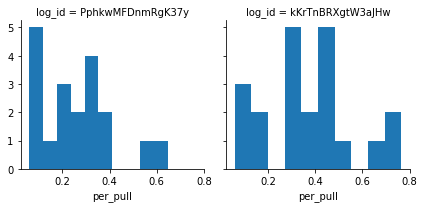

In [33]:
sns.FacetGrid(data=healthstones, 
              col='log_id', 
              col_order=['PphkwMFDnmRgK37y', 'kKrTnBRXgtW3aJHw'])\
.map(plt.hist, "per_pull");
plt.savefig('healthstones_per_pull_180907.png')

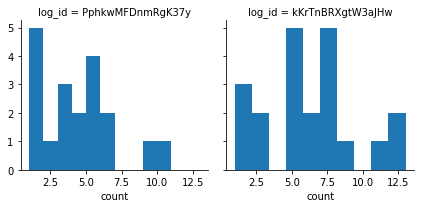

In [34]:
sns.FacetGrid(data=healthstones, 
              col='log_id', 
              col_order=['PphkwMFDnmRgK37y', 'kKrTnBRXgtW3aJHw'])\
.map(plt.hist, "count");
plt.savefig('healthstones_total_180907.png')

In [36]:
healthstones.groupby('log_id').per_pull.mean()

log_id
PphkwMFDnmRgK37y    0.235294
kKrTnBRXgtW3aJHw    0.364146
Name: per_pull, dtype: float64

#### Zek'voz Sep 19

In [9]:
log_df = pd.read_csv('master_list.csv')
log_df.head()

,log_id,log_start,log_end,pull_id,pull_start,pull_end,boss_id,boss_name,kill,player_name
0,4mzCD2x9hnqZb3KG,1536804378912,1536814385116,3,300554,452519,2135,Mythrax,False,Katanescence
1,4mzCD2x9hnqZb3KG,1536804378912,1536814385116,3,300554,452519,2135,Mythrax,False,Vaelyra
2,4mzCD2x9hnqZb3KG,1536804378912,1536814385116,3,300554,452519,2135,Mythrax,False,Toy
3,4mzCD2x9hnqZb3KG,1536804378912,1536814385116,3,300554,452519,2135,Mythrax,False,Liavre
4,4mzCD2x9hnqZb3KG,1536804378912,1536814385116,3,300554,452519,2135,Mythrax,False,Tawn


**Most recent log details**

ID: nCLBA4NJHkKmzM37	Start: 1537409044919	End: 1537419704897

In [11]:
zekvoz = log_df.query('log_id == "nCLBA4NJHkKmzM37" & boss_id == 2136')
zekvoz.head()

,log_id,log_start,log_end,pull_id,pull_start,pull_end,boss_id,boss_name,kill,player_name
1953,nCLBA4NJHkKmzM37,1537496012825,1537506043127,1,61746,143850,2136,Zek'voz,False,Vaelyra
1954,nCLBA4NJHkKmzM37,1537496012825,1537506043127,1,61746,143850,2136,Zek'voz,False,Vampyric
1955,nCLBA4NJHkKmzM37,1537496012825,1537506043127,1,61746,143850,2136,Zek'voz,False,Cagliostro
1956,nCLBA4NJHkKmzM37,1537496012825,1537506043127,1,61746,143850,2136,Zek'voz,False,Mythrose
1957,nCLBA4NJHkKmzM37,1537496012825,1537506043127,1,61746,143850,2136,Zek'voz,False,Sumi


In [12]:
player_names = pd.read_csv('player_list.csv')
player_names.head()

,player,primary_role,alt,tier_end,tier_start,start_date
0,Vaelyra,mdps,NaN,NaN,True,NaN
1,Metonymy,rdps,NaN,NaN,True,NaN
2,Brian,mdps,NaN,NaN,True,NaN
3,Petrol,rdps,NaN,NaN,True,NaN
4,Ayriea,rdps,NaN,NaN,True,NaN


In [13]:
healthstones = wl.cast_count(api_key, zekvoz, 6262, boss_id=2136)
healthstones.head()

Player added: Katanescence
Player added: Sumi
Player added: Cagliostro
Player added: Brian
Player added: Dough
Player added: Ayriea
Player added: Stradlock
Player added: Petrol
Player added: Psychodruid
Player added: Toy
Player added: Vampyric
Player added: Liavre
Player added: Jampers
Player added: Acturus
Player added: Illestra
Player added: Draigo
Player added: Mythrose
Player added: Velryssa
Player added: Metonymy
Player added: Earrl


,log_id,spell_id,player,count
0,nCLBA4NJHkKmzM37,6262,Katanescence,9
1,nCLBA4NJHkKmzM37,6262,Sumi,5
2,nCLBA4NJHkKmzM37,6262,Cagliostro,16
3,nCLBA4NJHkKmzM37,6262,Brian,13
4,nCLBA4NJHkKmzM37,6262,Dough,14


In [14]:
healthstones = healthstones.merge(player_names[['player', 'primary_role']], how='left', on='player')
healthstones.head()

,log_id,spell_id,player,count,primary_role
0,nCLBA4NJHkKmzM37,6262,Katanescence,9,healer
1,nCLBA4NJHkKmzM37,6262,Sumi,5,rdps
2,nCLBA4NJHkKmzM37,6262,Cagliostro,16,mdps
3,nCLBA4NJHkKmzM37,6262,Brian,13,mdps
4,nCLBA4NJHkKmzM37,6262,Dough,14,rdps


In [16]:
bins = np.arange(0.5, healthstones['count'].max() + 1.5, 1)

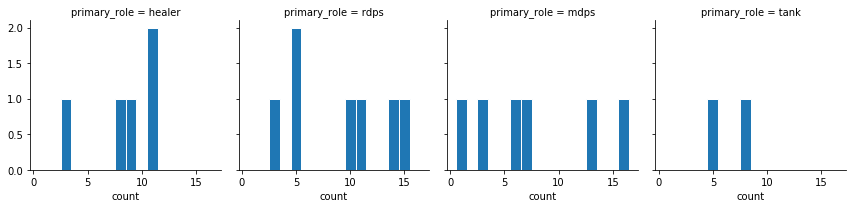

In [19]:
sns.FacetGrid(data=healthstones, 
              col='primary_role' 
              )\
.map(plt.hist, "count", bins=bins, edgecolor='white');
plt.savefig('healthstones_zekvoz_180921.png')

In [20]:
healthstones['count'].mean()

8.2

In [21]:
healthstones['count'].sum()

164

In [22]:
healthstones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
log_id          20 non-null object
spell_id        20 non-null int64
player          20 non-null object
count           20 non-null int64
primary_role    20 non-null object
dtypes: int64(2), object(3)
memory usage: 1.6+ KB


In [29]:
healthstones['per fight'] = healthstones['count']/27

In [30]:
zekvoz_0921 = log_df.query('log_id == "ArVhTvdPmLf9JHjR" & boss_id == 2136')

In [32]:
healthstones_0921 = wl.cast_count(api_key, zekvoz_0921, 6262, boss_id=2136)

Player added: Draigo
Player added: Acturus
Player added: Stradlock
Player added: Liavre
Player added: Toy
Player added: Cagliostro
Player added: Katanescence
Player added: Shadowbaine
Player added: Psychodruid
Player added: Brian
Player added: Illestra
Player added: Vampyric
Player added: Jampers
Player added: Dough
Player added: Ayriea
Player added: Earrl


In [33]:
healthstones_0921['per fight'] = healthstones_0921['count']/11

In [41]:
healthstones_0921 = healthstones_0921.merge(player_names[['player', 'primary_role']], how='left', on='player')

In [42]:
comb_hs = pd.concat([healthstones, healthstones_0921])
comb_hs.head()

,count,log_id,per fight,player,primary_role,spell_id
0,9,nCLBA4NJHkKmzM37,0.333333,Katanescence,healer,6262
1,5,nCLBA4NJHkKmzM37,0.185185,Sumi,rdps,6262
2,16,nCLBA4NJHkKmzM37,0.592593,Cagliostro,mdps,6262
3,13,nCLBA4NJHkKmzM37,0.481481,Brian,mdps,6262
4,14,nCLBA4NJHkKmzM37,0.518519,Dough,rdps,6262


In [43]:
comb_hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 15
Data columns (total 6 columns):
count           36 non-null int64
log_id          36 non-null object
per fight       36 non-null float64
player          36 non-null object
primary_role    36 non-null object
spell_id        36 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


In [52]:
bins = np.arange(0.05, comb_hs['per fight'].max() + 0.15, 0.1)

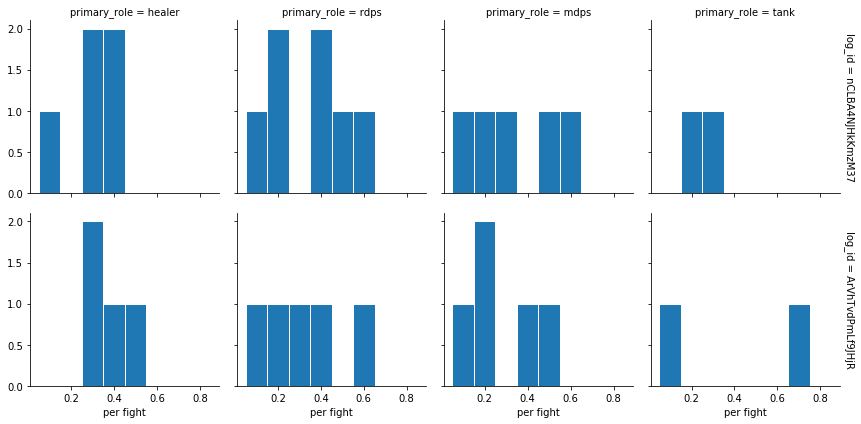

In [53]:
sns.FacetGrid(data=comb_hs, 
              col='primary_role',
              row='log_id',
              margin_titles=True
              )\
.map(plt.hist, "per fight", bins=bins, edgecolor='white');
plt.savefig('healthstones_zekvoz_week1.png')

In [47]:
comb_hs.groupby(['primary_role', 'log_id'])['per fight'].count()

primary_role  log_id          
healer        ArVhTvdPmLf9JHjR    4
              nCLBA4NJHkKmzM37    5
mdps          ArVhTvdPmLf9JHjR    5
              nCLBA4NJHkKmzM37    6
rdps          ArVhTvdPmLf9JHjR    5
              nCLBA4NJHkKmzM37    7
tank          ArVhTvdPmLf9JHjR    2
              nCLBA4NJHkKmzM37    2
Name: per fight, dtype: int64

In [48]:
comb_hs.groupby('log_id')['per fight'].count()

log_id
ArVhTvdPmLf9JHjR    16
nCLBA4NJHkKmzM37    20
Name: per fight, dtype: int64

In [49]:
comb_hs.groupby(['primary_role', 'log_id'])['per fight'].mean()

primary_role  log_id          
healer        ArVhTvdPmLf9JHjR    0.340909
              nCLBA4NJHkKmzM37    0.311111
mdps          ArVhTvdPmLf9JHjR    0.254545
              nCLBA4NJHkKmzM37    0.283951
rdps          ArVhTvdPmLf9JHjR    0.309091
              nCLBA4NJHkKmzM37    0.333333
tank          ArVhTvdPmLf9JHjR    0.409091
              nCLBA4NJHkKmzM37    0.240741
Name: per fight, dtype: float64

**Coastal Healing Potions**

250870

In [23]:
health_pots = wl.cast_count(api_key, zekvoz, 250870, boss_id=2136)
health_pots.head()

Player added: Draigo
Player added: Illestra
Player added: Cagliostro
Player added: Dough
Player added: Stradlock
Player added: Sumi
Player added: Ayriea
Player added: Metonymy
Player added: Psychodruid
Player added: Vampyric


,log_id,spell_id,player,count
0,nCLBA4NJHkKmzM37,250870,Draigo,4
1,nCLBA4NJHkKmzM37,250870,Illestra,14
2,nCLBA4NJHkKmzM37,250870,Cagliostro,12
3,nCLBA4NJHkKmzM37,250870,Dough,13
4,nCLBA4NJHkKmzM37,250870,Stradlock,9


In [24]:
health_pots = health_pots.merge(player_names[['player', 'primary_role']], how='left', on='player')

In [26]:
health_pots.head()

,log_id,spell_id,player,count,primary_role
0,nCLBA4NJHkKmzM37,250870,Draigo,4,tank
1,nCLBA4NJHkKmzM37,250870,Illestra,14,healer
2,nCLBA4NJHkKmzM37,250870,Cagliostro,12,mdps
3,nCLBA4NJHkKmzM37,250870,Dough,13,rdps
4,nCLBA4NJHkKmzM37,250870,Stradlock,9,rdps


In [56]:
health_pots['per_fight'] = health_pots['count']/27

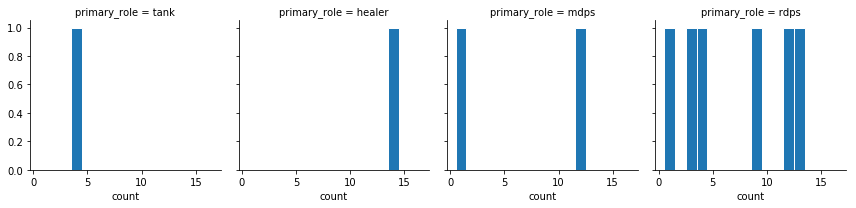

In [25]:
sns.FacetGrid(data=health_pots, 
              col='primary_role' 
              )\
.map(plt.hist, "count", bins=bins, edgecolor='white');
plt.savefig('healthpots_zekvoz_180920.png')

In [27]:
health_pots['count'].mean()

7.3

In [28]:
health_pots['count'].sum()

73

In [51]:
health_pots_0919 = wl.cast_count(api_key, zekvoz_0921, 250870, boss_id=2136)

Player added: Vampyric
Player added: Dough
Player added: Stradlock
Player added: Cagliostro
Player added: Psychodruid


In [54]:
health_pots_0919['per_fight'] = healthstones_0921['count']/11

In [55]:
health_pots_0919 = health_pots_0919.merge(player_names[['player', 'primary_role']], how='left', on='player')

In [57]:
comb_hp = pd.concat([health_pots, health_pots_0919])
comb_hp.head()

,count,log_id,per_fight,player,primary_role,spell_id
0,4,nCLBA4NJHkKmzM37,0.148148,Draigo,tank,250870
1,14,nCLBA4NJHkKmzM37,0.518519,Illestra,healer,250870
2,12,nCLBA4NJHkKmzM37,0.444444,Cagliostro,mdps,250870
3,13,nCLBA4NJHkKmzM37,0.481481,Dough,rdps,250870
4,9,nCLBA4NJHkKmzM37,0.333333,Stradlock,rdps,250870


In [58]:
bins = np.arange(0.05, comb_hp.per_fight.max() + 0.15, 0.1)

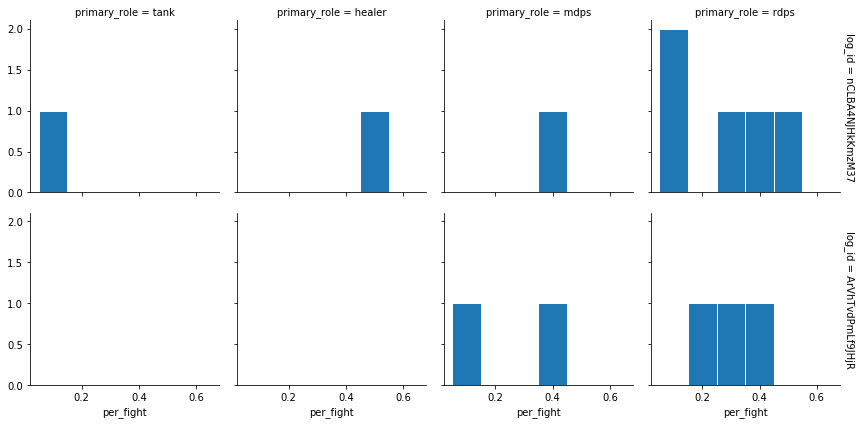

In [60]:
sns.FacetGrid(data=comb_hp, 
              col='primary_role',
              row='log_id',
              margin_titles=True
              )\
.map(plt.hist, "per_fight", bins=bins, edgecolor='white');
plt.savefig('health_pots_zekvoz_week1.png')

### Damage Taken
Mythrax (2135) - Crashing Oblivion (276863)

In [4]:
log_df = pd.read_csv('master_list.csv')
log_df.head()

,log_id,log_start,log_end,pull_id,pull_start,pull_end,boss_id,boss_name,kill,player_name
0,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,1,105782,425904,2144,Taloc,True,Brian
1,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,1,105782,425904,2144,Taloc,True,Acturus
2,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,1,105782,425904,2144,Taloc,True,Draigo
3,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,1,105782,425904,2144,Taloc,True,Ayriea
4,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,1,105782,425904,2144,Taloc,True,Shadowbaine


In [19]:
player_names = pd.read_csv('player_list.csv')
player_names.head()

,player,primary_role,alt,tier_end,tier_start,start_date
0,Vaelyra,damage,NaN,NaN,True,NaN
1,Metonymy,damage,NaN,NaN,True,NaN
2,Brian,damage,NaN,NaN,True,NaN
3,Petrol,damage,NaN,NaN,True,NaN
4,Ayriea,damage,NaN,NaN,True,NaN


In [11]:
player_names.player

0          Vaelyra
1         Metonymy
2            Brian
3           Petrol
4           Ayriea
5        Stradlock
6           Uuglei
7            Earrl
8         Illestra
9            Kamer
10      Cagliostro
11            Tawn
12          Draigo
13     Psychodruid
14    Katanescence
15            Sumi
16             Toy
17        Mythrose
18     Shadowbaine
19         Acturus
20        Velryssa
21         Jampers
22           Dough
23          Liavre
Name: player, dtype: object

In [12]:
melee = ['Vaelyra', 'Brian', 'Uuglei', 'Kamer', 'Cagliostro', 'Toy', 'Velryssa', 'Liavre']

In [25]:
dps = player_names.primary_role == 'damage'
player_names.loc[dps, 'primary_role'] = 'rdps'

In [26]:
player_names.head()

,player,primary_role,alt,tier_end,tier_start,start_date
0,Vaelyra,rdps,NaN,NaN,True,NaN
1,Metonymy,rdps,NaN,NaN,True,NaN
2,Brian,rdps,NaN,NaN,True,NaN
3,Petrol,rdps,NaN,NaN,True,NaN
4,Ayriea,rdps,NaN,NaN,True,NaN


In [27]:
mdps = player_names.player.isin(melee)
player_names.loc[mdps, 'primary_role'] = 'mdps'

In [28]:
player_names.head()

,player,primary_role,alt,tier_end,tier_start,start_date
0,Vaelyra,mdps,NaN,NaN,True,NaN
1,Metonymy,rdps,NaN,NaN,True,NaN
2,Brian,mdps,NaN,NaN,True,NaN
3,Petrol,rdps,NaN,NaN,True,NaN
4,Ayriea,rdps,NaN,NaN,True,NaN


In [29]:
player_names.primary_role.unique()

array(['mdps', 'rdps', 'tank', 'healer'], dtype=object)

In [39]:
player_names.to_csv('player_list.csv', index=False)

In [31]:
oblivion = wl.damage_taken(api_key, log_df, 276863, "Crashing Oblivion", 2135)
oblivion.head()

Player added: Draigo
Player added: Earrl
Player added: Vampyric
Player added: Sumi
Player added: Tawn
Player added: Vaelyra
Player added: Velryssa
Player added: Illestra
Player added: Psychodruid
Player added: Petrol
Player added: Katanescence
Player added: Metonymy
Player added: Brian
Player added: Cagliostro
Player added: Acturus
Player added: Jampers
Player added: Uuglei
Player added: Dough
Player added: Stradlock
Player added: Mythrose
Player added: Toy
Player added: Liavre
Player added: Ayriea
Player added: Shadowbaine


,log_id,spell_id,spell_name,player,hits,damage_taken
0,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Draigo,115,1931438
1,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Earrl,103,2078985
2,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Vampyric,103,1996927
3,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Sumi,100,2341946
4,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Tawn,90,2091424


In [32]:
oblivion = oblivion.merge(player_names[['player', 'primary_role']], how='left', on='player')
oblivion.head()

,log_id,spell_id,spell_name,player,hits,damage_taken,primary_role
0,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Draigo,115,1931438,tank
1,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Earrl,103,2078985,tank
2,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Vampyric,103,1996927,NaN
3,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Sumi,100,2341946,rdps
4,dgkHRTaMQGJ7Zm3C,276863,Crashing Oblivion,Tawn,90,2091424,rdps


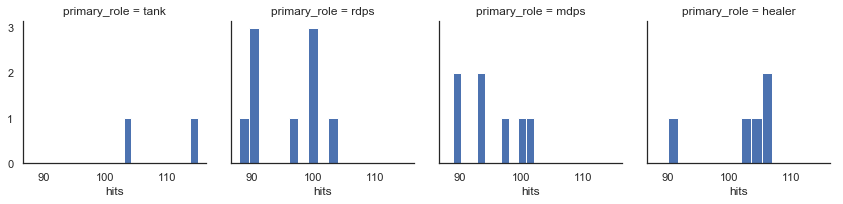

In [33]:
g = sns.FacetGrid(oblivion, col='primary_role')
g.map(plt.hist, 'hits');
#plt.savefig('ap_level_180905.png')

In [38]:
summ = oblivion.groupby('primary_role')['hits'].describe().transpose()
summ

primary_role,healer,mdps,rdps,tank
count,5.000000,7.000000,9.000000,2.000000
mean,102.200000,95.000000,95.444444,109.000000
std,7.049823,5.033223,5.939510,8.485281
min,90.000000,89.000000,88.000000,103.000000
25%,103.000000,91.500000,90.000000,106.000000
50%,104.000000,93.000000,97.000000,109.000000
75%,107.000000,99.000000,100.000000,112.000000
max,107.000000,102.000000,104.000000,115.000000


### Vectis Analysis
#### Lingering Infection
Spell ID: 265127

In [39]:
log_df = wl.import_clean_master_list()

In [49]:
vectis = log_df.query('boss_name == "Vectis"')
vectis.head()

,log_id,log_start,log_end,log_date,pull_id,pull_start,pull_end,pull_start_time,pull_end_time,boss_id,boss_name,kill,player_name
909,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,2018-09-12,13,2414320,2713591,00:40:14.320000,00:45:13.591000,2134,Vectis,True,Brian
910,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,2018-09-12,13,2414320,2713591,00:40:14.320000,00:45:13.591000,2134,Vectis,True,Acturus
911,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,2018-09-12,13,2414320,2713591,00:40:14.320000,00:45:13.591000,2134,Vectis,True,Draigo
912,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,2018-09-12,13,2414320,2713591,00:40:14.320000,00:45:13.591000,2134,Vectis,True,Ayriea
913,dgkHRTaMQGJ7Zm3C,1536717786563,1536728293438,2018-09-12,13,2414320,2713591,00:40:14.320000,00:45:13.591000,2134,Vectis,True,Shadowbaine


In [50]:
vectis = vectis[vectis.log_id == 'JTrPMkjvCH6NtR7x']
vectis.head()

,log_id,log_start,log_end,log_date,pull_id,pull_start,pull_end,pull_start_time,pull_end_time,boss_id,boss_name,kill,player_name
2006,JTrPMkjvCH6NtR7x,1538619012152,1538629050059,2018-10-04,3,422865,460845,00:07:02.865000,00:07:40.845000,2134,Vectis,False,Mythrose
2007,JTrPMkjvCH6NtR7x,1538619012152,1538629050059,2018-10-04,3,422865,460845,00:07:02.865000,00:07:40.845000,2134,Vectis,False,Cagliostro
2008,JTrPMkjvCH6NtR7x,1538619012152,1538629050059,2018-10-04,3,422865,460845,00:07:02.865000,00:07:40.845000,2134,Vectis,False,Acturus
2009,JTrPMkjvCH6NtR7x,1538619012152,1538629050059,2018-10-04,3,422865,460845,00:07:02.865000,00:07:40.845000,2134,Vectis,False,Illestra
2010,JTrPMkjvCH6NtR7x,1538619012152,1538629050059,2018-10-04,3,422865,460845,00:07:02.865000,00:07:40.845000,2134,Vectis,False,Velryssa


The required log ID is: `JTrPMkjvCH6NtR7x`

In [56]:
vectis_start = vectis.pull_start.unique()
vectis_start

array([ 422865, 1345169, 1687033, 2041565, 2542388, 2882719, 3203114,
       3473957, 3737565, 3919162, 4181406, 4435827, 5440833, 6024561,
       6404441, 6894847, 7368640, 7707746, 8036319, 8305880, 8554126,
       8902825, 9396842, 9693471], dtype=int64)

In [57]:
vectis_end = vectis.pull_end.unique()
vectis_end

array([ 460845, 1490941, 1906724, 2243348, 2664749, 3041910, 3362252,
       3619826, 3821815, 4057486, 4339546, 4660329, 5737097, 6215155,
       6678764, 7183888, 7559956, 7925056, 8225485, 8461676, 8822495,
       9199105, 9605674, 9965670], dtype=int64)

In [58]:
link_start = 'https://www.warcraftlogs.com:443/v1/report/tables/debuffs/JTrPMkjvCH6NtR7x?start='

In [59]:
link_join = '&end='

In [60]:
link_end = '&abilityid=265127&api_key=' + api_key

In [68]:
df_list = []
for i in range(len(vectis_start)):
    link = link_start + str(vectis_start[i]) + link_join + str(vectis_end[i]) + link_end
    print('Getting details for pull starting {} and finishing {}.'.format(str(vectis_start[i]), str(vectis_end[i])))
    details = wl.get_query_details(link)
    for player in details['auras']:
        print('Getting details for', player['name'])
        name = player['name']
        debuff_count = player['totalUses']
        df_list.append({
            'pull_start': vectis_start[i],
            'pull_end': vectis_end[i],
            'player': name,
            'debuff_count': debuff_count,
        })

Getting details for pull starting 422865 and finishing 460845.
Getting details for Cagliostro
Getting details for Petrol
Getting details for Velryssa
Getting details for Earrl
Getting details for pull starting 1345169 and finishing 1490941.
Getting details for Uuglei
Getting details for Acturus
Getting details for Metonymy
Getting details for Illestra
Getting details for Vampyric
Getting details for Cagliostro
Getting details for Jampers
Getting details for Sumi
Getting details for Earrl
Getting details for Stradlock
Getting details for Ayriea
Getting details for Vaelyra
Getting details for Draigo
Getting details for Katanescence
Getting details for Velryssa
Getting details for Liavre
Getting details for Toy
Getting details for Mythrose
Getting details for pull starting 1687033 and finishing 1906724.
Getting details for Uuglei
Getting details for Acturus
Getting details for Metonymy
Getting details for Illestra
Getting details for Vampyric
Getting details for Cagliostro
Getting details

Getting details for Uuglei
Getting details for Acturus
Getting details for Metonymy
Getting details for Illestra
Getting details for Vampyric
Getting details for Cagliostro
Getting details for Jampers
Getting details for Sumi
Getting details for Stradlock
Getting details for Ayriea
Getting details for Vaelyra
Getting details for Brian
Getting details for Draigo
Getting details for Katanescence
Getting details for Velryssa
Getting details for Petrol
Getting details for Liavre
Getting details for Mythrose
Getting details for Toy
Getting details for pull starting 8036319 and finishing 8225485.
Getting details for Uuglei
Getting details for Acturus
Getting details for Metonymy
Getting details for Illestra
Getting details for Vampyric
Getting details for Cagliostro
Getting details for Jampers
Getting details for Sumi
Getting details for Earrl
Getting details for Stradlock
Getting details for Ayriea
Getting details for Vaelyra
Getting details for Draigo
Getting details for Katanescence
Getti

In [69]:
df = pd.DataFrame(df_list)
df.head()

,debuff_count,player,pull_end,pull_start
0,1,Cagliostro,460845,422865
1,1,Petrol,460845,422865
2,1,Velryssa,460845,422865
3,2,Earrl,460845,422865
4,2,Uuglei,1490941,1345169


In [70]:
df.sort_values(by='pull_start', inplace=True)

In [73]:
df['pull_duration'] = df.pull_end - df.pull_start

In [74]:
df['count_per_duration'] = df.debuff_count/df.pull_duration

In [75]:
df.head()

,debuff_count,player,pull_end,pull_start,pull_duration,count_per_duration
0,1,Cagliostro,460845,422865,37980,0.000026
1,1,Petrol,460845,422865,37980,0.000026
2,1,Velryssa,460845,422865,37980,0.000026
3,2,Earrl,460845,422865,37980,0.000053
21,6,Mythrose,1490941,1345169,145772,0.000041


In [77]:
df.count_per_duration.describe()

count    427.000000
mean       0.000023
std        0.000011
min        0.000003
25%        0.000014
50%        0.000021
75%        0.000029
max        0.000069
Name: count_per_duration, dtype: float64

In [80]:
bins = np.arange(df.count_per_duration.min(), df.count_per_duration.max(), 0.00001)

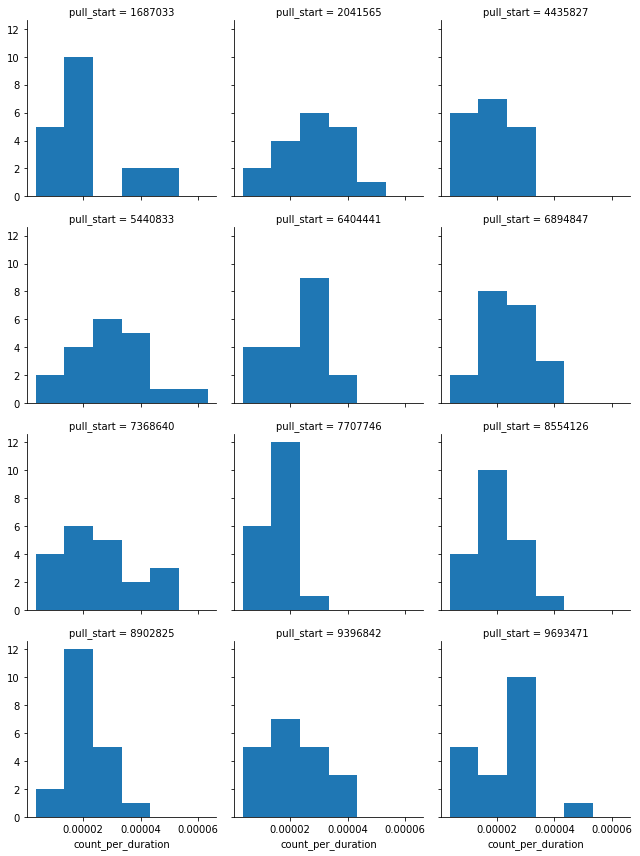

In [85]:
g = sns.FacetGrid(df[df.pull_duration >= df.pull_duration.median()], col='pull_start', col_wrap=3)
g.map(plt.hist, 'count_per_duration', bins=bins);

In [82]:
df.pull_duration.describe()

count       427.000000
mean     203194.711944
std       58732.293187
min       37980.000000
25%      158140.000000
50%      191316.000000
75%      268369.000000
max      296280.000000
Name: pull_duration, dtype: float64

In [95]:
count_bins = np.arange(df.debuff_count.min(), df.debuff_count.max() + 1, 3)

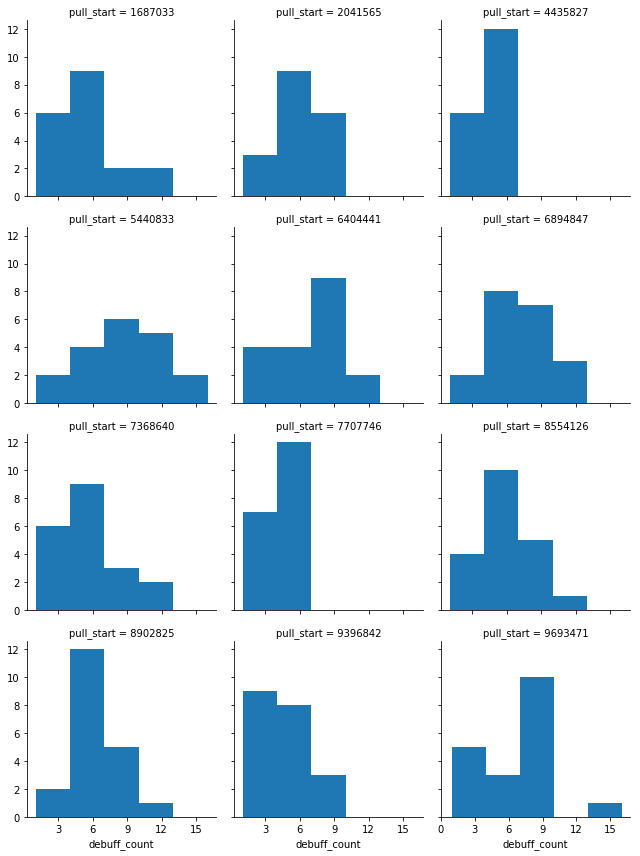

In [99]:
g = sns.FacetGrid(df[df.pull_duration >= df.pull_duration.median()], col='pull_start', col_wrap=3)
g.map(plt.hist, 'debuff_count', bins=count_bins)
plt.xticks(np.arange(0, 18, 3));

### Fetid Analysis
- Corruption Corpuscle ID: 133492
- Mutated Mass ID: 139866
- Boss ID: 2128

In [13]:
log_df = wl.import_clean_master_list()

In [12]:
log_df.sort_values(by='log_date', ascending=False).head()

,log_id,log_start,log_end,log_date,pull_id,pull_start,pull_end,pull_start_time,pull_end_time,boss_id,boss_name,kill,player_name
6498,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,30,4198152,4336345,01:09:58.152000,01:12:16.345000,2128,Fetid Devourer,False,Toy
6607,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,38,6375743,6495896,01:46:15.743000,01:48:15.896000,2128,Fetid Devourer,False,Tawn
6599,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,38,6375743,6495896,01:46:15.743000,01:48:15.896000,2128,Fetid Devourer,False,Liavre
6600,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,38,6375743,6495896,01:46:15.743000,01:48:15.896000,2128,Fetid Devourer,False,Psychodruid
6601,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,38,6375743,6495896,01:46:15.743000,01:48:15.896000,2128,Fetid Devourer,False,Cagliostro


Most recent log ID is WLBzQp3jVR2q4trJ.

In [15]:
fetid_met = log_df.query('log_id == "WLBzQp3jVR2q4trJ" & player_name == "Metonymy"')
fetid_met

,log_id,log_start,log_end,log_date,pull_id,pull_start,pull_end,pull_start_time,pull_end_time,boss_id,boss_name,kill,player_name
6352,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,18,1942858,2077288,00:32:22.858000,00:34:37.288000,2128,Fetid Devourer,False,Metonymy
6372,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,19,2343968,2476129,00:39:03.968000,00:41:16.129000,2128,Fetid Devourer,False,Metonymy
6392,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,20,2630001,2749064,00:43:50.001000,00:45:49.064000,2128,Fetid Devourer,False,Metonymy
6412,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,25,3144345,3328908,00:52:24.345000,00:55:28.908000,2128,Fetid Devourer,False,Metonymy
6432,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,26,3429749,3618120,00:57:09.749000,01:00:18.120000,2128,Fetid Devourer,False,Metonymy
6452,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,28,3715259,3827904,01:01:55.259000,01:03:47.904000,2128,Fetid Devourer,False,Metonymy
6472,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,29,3926830,4049501,01:05:26.830000,01:07:29.501000,2128,Fetid Devourer,False,Metonymy
6492,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,30,4198152,4336345,01:09:58.152000,01:12:16.345000,2128,Fetid Devourer,False,Metonymy
6512,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,33,4446498,4637582,01:14:06.498000,01:17:17.582000,2128,Fetid Devourer,False,Metonymy
6532,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,35,4776918,4886653,01:19:36.918000,01:21:26.653000,2128,Fetid Devourer,False,Metonymy


Want to examine last three pulls for Met as arcane.

In [25]:
met_arcane = fetid_met.tail(3)
met_arcane

,log_id,log_start,log_end,log_date,pull_id,pull_start,pull_end,pull_start_time,pull_end_time,boss_id,boss_name,kill,player_name
6772,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,47,8913154,9031389,02:28:33.154000,02:30:31.389000,2128,Fetid Devourer,False,Metonymy
6792,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,48,9150125,9282388,02:32:30.125000,02:34:42.388000,2128,Fetid Devourer,False,Metonymy
6812,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,50,9391513,9503102,02:36:31.513000,02:38:23.102000,2128,Fetid Devourer,False,Metonymy


Want pulls 12, 13, 14 for frost.

In [22]:
met_frost = fetid_met[fetid_met.pull_id.astype(int) >= 37].head(3)
met_frost

,log_id,log_start,log_end,log_date,pull_id,pull_start,pull_end,pull_start_time,pull_end_time,boss_id,boss_name,kill,player_name
6572,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,37,6104621,6284911,01:41:44.621000,01:44:44.911000,2128,Fetid Devourer,False,Metonymy
6592,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,38,6375743,6495896,01:46:15.743000,01:48:15.896000,2128,Fetid Devourer,False,Metonymy
6612,WLBzQp3jVR2q4trJ,1539828002713,1539837571342,2018-10-18,39,6614325,6749227,01:50:14.325000,01:52:29.227000,2128,Fetid Devourer,False,Metonymy


In [37]:
link = 'https://www.warcraftlogs.com:443/v1/report/tables/damage-taken/WLBzQp3jVR2q4trJ?start=8913154%09&end=9503102&hostility=1&by=target&difficulty=5&api_key=' + api_key

In [38]:
log = requests.get(link).json()

In [28]:
log.keys()

dict_keys(['entries', 'totalTime', 'logVersion'])

In [39]:
df_list = []
for player in log['entries']:
    if player['name'] == 'Metonymy':
        for target in player['targets']:
            df_list.append({
            'player': player['name'],
            'target': target['name'],
            'damage': target['total']
                
        })

In [40]:
arcane = pd.DataFrame(df_list)
arcane

,damage,player,target
0,2037807,Metonymy,Fetid Devourer
1,957906,Metonymy,Mutated Mass
2,397077,Metonymy,Corruption Corpuscle
3,1867,Metonymy,Nazmani Weevil


In [41]:
arcane['spec'] = 'arcane'

In [34]:
link = 'https://www.warcraftlogs.com:443/v1/report/tables/damage-taken/WLBzQp3jVR2q4trJ?start=6104621%09&end=6749227&hostility=1&by=target&difficulty=5&api_key=' + api_key

In [35]:
log = requests.get(link).json()
df_list = []
for player in log['entries']:
    if player['name'] == 'Metonymy':
        for target in player['targets']:
            df_list.append({
            'player': player['name'],
            'target': target['name'],
            'damage': target['total']
                
        })

In [36]:
frost = pd.DataFrame(df_list)
frost

,damage,player,target
0,1799540,Metonymy,Fetid Devourer
1,721298,Metonymy,Corruption Corpuscle
2,373752,Metonymy,Mutated Mass


In [42]:
frost['spec'] = 'frost'

In [43]:
met = pd.concat([arcane, frost])
met

,damage,player,target,spec
0,2037807,Metonymy,Fetid Devourer,arcane
1,957906,Metonymy,Mutated Mass,arcane
2,397077,Metonymy,Corruption Corpuscle,arcane
3,1867,Metonymy,Nazmani Weevil,arcane
0,1799540,Metonymy,Fetid Devourer,frost
1,721298,Metonymy,Corruption Corpuscle,frost
2,373752,Metonymy,Mutated Mass,frost


In [47]:
met.drop(3, inplace=True)

C:\Users\rebecca-barnes\Anaconda3\envs\dand\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


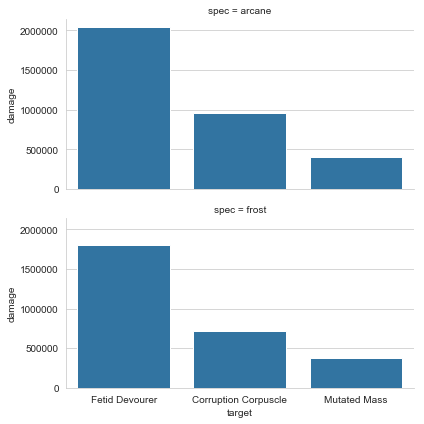

In [56]:
sns.set_style("whitegrid")
g = sns.FacetGrid(met, row='spec', aspect=2)
g.map(sns.barplot, 'target', 'damage', ci=None);